In [1]:
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt
import easygems.healpix as egh
import cartopy.crs as ccrs
import healpy as hp
import numpy as np

In [4]:
def get_nn_lon_lat_index(nside, lons, lats):
    """
    nside: integer, power of 2. The return of hp.get_nside()
    lons: uniques values of longitudes
    lats: uniques values of latitudes
    returns: array with the HEALPix cells that are closest to the lon/lat grid
    """
    lons2, lats2 = np.meshgrid(lons, lats)
    return xr.DataArray(
        hp.ang2pix(nside, lons2, lats2, nest = True, lonlat = True),
        coords=[("lat", lats), ("lon", lons)],
    )

In [3]:
zarr_file = "/g/data/qx55/uk_node/glm.n2560_RAL3p3/data.healpix.PT1H.z5.zarr"
ds = xr.open_zarr(zarr_file)

In [5]:
tas_um = ds['tas']

In [14]:
# Find the HEALPix pixels that are closest to the ERA5 grid
res = 0.3
# longitudes and latitudes for the ERA5 grid
lon = np.arange(130,132+res,res)
lat = np.arange(-13.5, -11.5+res,res)

# nside for um simulation, it should be equal to 2**zoom
this_nside = hp.get_nside(tas_um)

cells = get_nn_lon_lat_index(this_nside, lon, lat) 

tas_um_regrided = tas_um.isel(cell = cells).rename({'lon': 'longitude', 'lat': 'latitude'}) # regriding


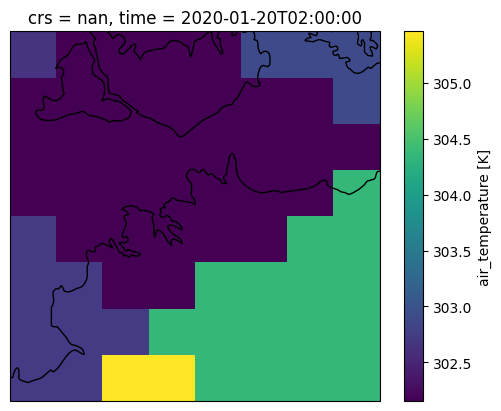

In [16]:
projection = ccrs.PlateCarree(central_longitude = 0.0)
fig, ax = plt.subplots(subplot_kw = {"projection": projection})
tas_um_regrided.isel(time = 2).plot(cmap = 'viridis', transform = ccrs.PlateCarree())
ax.coastlines()